# SpectraHow Prediction SDK

The DHL_SDK is a software development kit (SDK) designed to simplify and streamline the integration of DataHowLab's Prediction capabilities into a simple Python package. This SDK provides developers with a convenient and efficient way to interact with DataHowLab's API, enabling access to the Projects and Models created, as well as making predictions using these models with new sets of data.

### Prerequisites:

- **Python:** Ensure you have Python installed (version 3.9 or higher) on your system.
- **API Key** Make sure you have a valid DataHowLab API Key. You can store it as an Enviroment variable or use it directly. 

### Installation:

- Run the following command to install DHL_SDK from its GitHub repository using pip:

   ```shell
   pip install git+https://github.com/DataHow/DHL_SDK.git

## Using the SDK

1. Import the necessary modules, including `SpectraHowClient` and `APIKeyAuthentication`
2. You initialize an instance of the `APIKeyAuthentication` class, which is used to authenticate your access to DHL's SpectraHow service using an API key.
3. Then, you create a client instance, `client`, for the SpectraHow service and provide the previously initialized `key` for authentication. This client will be used to interact with the SpectraHow service to perform various actions, such as making predictions.

In [1]:
%load_ext dotenv
%dotenv
from dhl_sdk import SpectraHowClient, APIKeyAuthentication

# DHL_API_KEY env var is loaded from the .env file
key = APIKeyAuthentication()
client = SpectraHowClient(auth_key=key, base_url="https://dev.datahowlab.ch/")

4. `client.get_projects()` is called to retrieve a list of projects. You can filter the projects by name if you include `name=name_of_the_project`. 
5. This will result in a Iterable object. To access each project, you can use the `next(projects)` function.

In [2]:
projects = client.get_projects(name="testing timeseries 2")
project = next(projects)
print(project)

id='3f971a29-5647-4a8d-8c91-05929069846f' name='testing timeseries 2' description='asdasd' process_unit_id='373c173a-1f23-4e56-874e-90ca4702ec0d'


6. Once you find your project of interest, you can access all the models inside that project using the `get_models()` method. 
7. If you want to print all the models inside a project, just convert the object `models` into a list.

In [3]:
models = project.get_models()
model = next(models)

model.dataset.variables

[Variable(id='d85df1ef-1055-4d44-815c-def30e3213ba', name='Kaiser Raman', code='spc', variant='spectrum', group_code=<GroupCode.SPC: 'SPC'>, size=3326),
 Variable(id='14e584b2-7bd0-4dcf-ac62-0ab06ee7d4ae', name='spectra glucose', code='glucose', variant='numeric', group_code=<GroupCode.TGT: 'TGT'>, size=None),
 Variable(id='f6c63537-50b2-41b8-aa2d-1c2f205c5882', name='SpectraVCD', code='spcvcd', variant='numeric', group_code=<GroupCode.TGT: 'TGT'>, size=None)]

8. Now all we need is some spectra data! 

The data needs to be in a 2D array format, either in list or numpy array. 

In [4]:
import numpy as np
spectra = np.genfromtxt("demo-spectra.csv", delimiter=',')
spectra = spectra[:, ~np.isnan(spectra).any(axis=0)]
spectra

array([[ 357944.,  364530.,  372103., ..., 2773852., 2767583., 2772518.],
       [ 363880.,  370384.,  376598., ..., 2752146., 2752439., 2758778.],
       [ 363586.,  368693.,  375430., ..., 2756330., 2752835., 2751421.],
       ...,
       [ 358698.,  365937.,  375747., ..., 2725370., 2728287., 2730954.],
       [ 364131.,  369949.,  377621., ..., 2732093., 2732457., 2737504.],
       [ 362428.,  369028.,  376778., ..., 2738000., 2736702., 2736453.]])

9. With the data in the correct format, you can use it to make predictions using the selected model, with `predict(spectra)`

In [5]:
predictions = model.predict(spectra)
print(predictions)

{'glucose': [23.809103890183188, 23.823064271987015, 23.789086192331716, 23.904057931580688, 23.773774669098053, 23.713891294803908, 23.655697774852193, 23.72545301388137, 23.80368218619102, 23.711049369729345, 23.656777304903322, 23.85196916998003, 23.670386068999697, 23.68355427741991], 'spcvcd': [9.955170395855916, 9.957045330445851, 9.95640507969613, 9.957052186972133, 9.956977773012946, 9.958151623505202, 9.961674392730915, 9.963842041620026, 9.960145519768984, 9.962478947424062, 9.962521557827047, 9.963247695163144, 9.963513886474402, 9.966238937516493]}


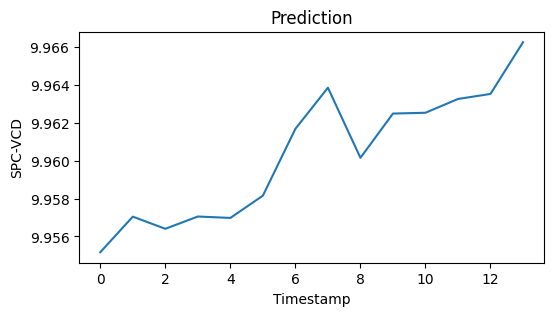

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,3))
plt.title("Prediction")
plt.plot(predictions["spcvcd"])
plt.xlabel("Timestamp")
plt.ylabel("SPC-VCD")
plt.show()